                                                    Author : Akshat Gupta

## Project : FareTaxi | Model : Linear Regression, Decision Tree, Random Forest

### - This is a regression problem, where I used Linear regression, Descision Tree, Random Forest to predict the 'amount' charged by the New York Taxi's on the basis of distance travelled and other features.

### - In this dataset, there were several aspect of data cleaning and feature engineering involved, where I :
#### 1. Removed data in amount, latitude/longitude, and no_of_passenger with value of '0'.
#### 2. Handled extreme values in amount which where either negative or too high for the distance travelled.
#### 3. Created a  function to remove coordinates which had same pickup and dropoff locations.
#### 4. Removed distance that had infinite or null values.

### - Here is the features engineering which resulted in improving the performance of my model :
#### 1. Converted time from UTC to EST.
#### 2. Created a new column 'hour' for the hour of the day.
#### 3. Extracted the day of booking.
#### 4. Added a feature to indicate if the booking day was a weekend or a weekday.
#### 5. Categorized the time of day into morning, afternoon, evening, and night.
#### 6. Calculated the distance in kilometers between the pickup and dropoff locations.

### Data Exploration

In [1]:
#importing required library and modules to perform analysis.
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the data
data = pd.read_csv(r"C:\Users\aksha\OneDrive\Desktop\GT Project\Taxi Fare Project\TaxiFare.csv")

In [3]:
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
data.tail()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2
49999,13:14.0,10.9,2010-01-13 08:13:14 UTC,-73.932603,40.763805,-73.932603,40.763805,1


In [5]:
data.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [7]:
data.isna().sum() # Checking columns with na values

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [8]:
data.duplicated().sum() # checking for duplicates

0

### Data Filtering and Feature Engineering

In [9]:
data.drop('unique_id',axis=1,inplace=True) # Dropped unique_id column

In [10]:
data['amount'].describe()

count    50000.000000
mean        11.364171
std          9.685557
min         -5.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: amount, dtype: float64

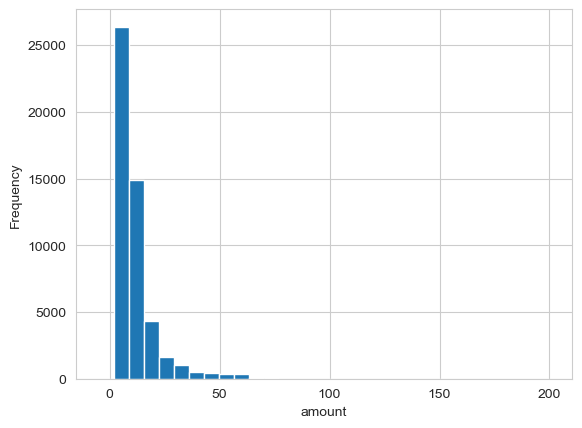

In [11]:
sns.set_style('whitegrid')
data['amount'].hist(bins=30)
plt.xlabel('amount')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Selected data['amount'] in the range from more than 0 to 60 as column amount had values which were either in negative or had outlier values.
data = data[(data['amount'] <= 60) & (data['amount'] > 0 )]

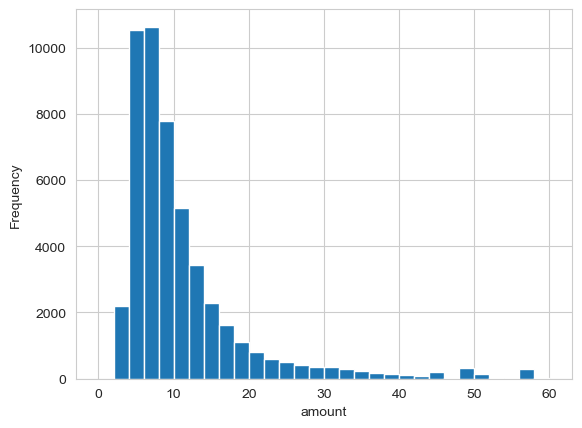

In [13]:
sns.set_style('whitegrid')
data['amount'].hist(bins=30)
plt.xlabel('amount')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Handling '0' values from no.of passenger
data = data[(data['no_of_passenger'] != 0)]

<Axes: xlabel='no_of_passenger', ylabel='count'>

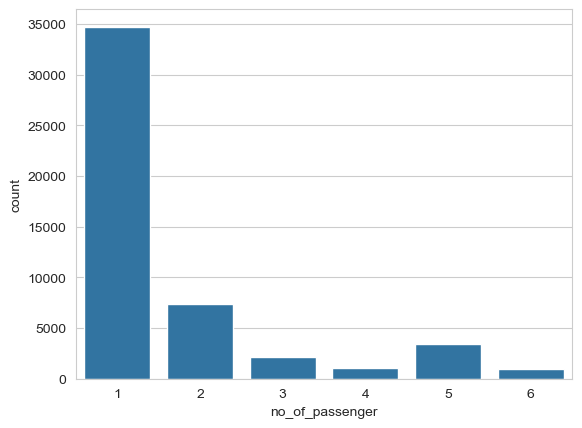

In [15]:
sns.countplot(x='no_of_passenger', data=data)

In [16]:
# Handling '0' values from 'longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff'.
#data = data[(data[['longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff','no_of_passenger']] != 0).all(axis=1)]

In [17]:
# created a function to check if pickup coordinates are same as dropoff coordinates

#def same_location(row):
#    return row['latitude_of_pickup'] == row['latitude_of_dropoff'] and row['longitude_of_pickup'] == row['longitude_of_dropoff']

# Applying the function to create a new column 'same_location'
#data['same_location'] = data.apply(same_location, axis=1)


In [18]:
#data['same_location'].value_counts()

In [19]:
#removed data which had same coordinates in pickup and dropoff locations
#data = data[(data['same_location'] != True)]

In [20]:
#data.drop('same_location',axis=1,inplace=True)

In [21]:
# Converting the date_time_of_pickup column to a datetime object
data['date_time_of_pickup'] = pd.to_datetime(data['date_time_of_pickup'])

In [22]:
# converting the date_time_of_pickup into EST date and time, and created a column 'datetime_est' 
data['datetime_est'] = data['date_time_of_pickup'].dt.tz_convert('US/Eastern')

In [23]:
# Created a new column 'Date' from the column 'datetime_est'
data['date'] = data['datetime_est'].dt.date

In [24]:
# Created a new column 'month' from the column 'datetime_est'
data['month'] = data['datetime_est'].dt.month

In [25]:
# Created a new column 'year' from the column 'datetime_est'
data['year'] = data['datetime_est'].dt.year

In [26]:
# Created a separate column for Hour
data['hour'] = data['datetime_est'].dt.strftime('%H')

In [27]:
# Converting Hour column into int dtype
data['hour'] = data['hour'].astype(int)

In [28]:
# Created a new column 'Day' to analyse the day of taxi ride
data['day'] = data['datetime_est'].dt.strftime('%a')

In [29]:
data['day_of_week'] = data['datetime_est'].dt.dayofweek

Text(0, 0.5, 'Frequency')

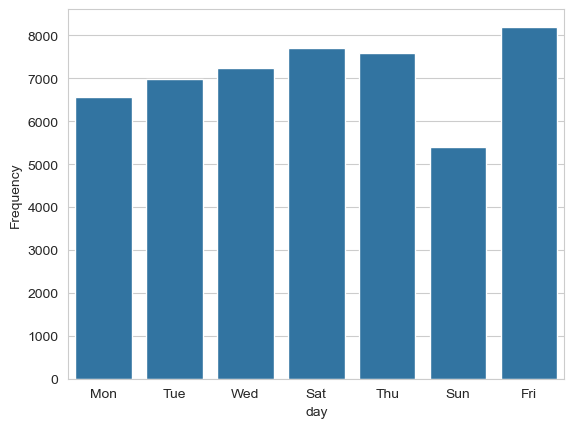

In [30]:
# Analysing frequency of Taxi rides on each day
sns.countplot(x='day',data=data)
plt.xlabel('day')
plt.ylabel('Frequency')

In [31]:
def weekend(day):
    if day == 4 or day == 5 or day == 6:
        return True
    else:
        return False
    
#creating a new feature weekend, if days are Sat or Sun
data['is_weekend'] = data['day_of_week'].apply(weekend)

#Converting bool to int dtype
data['is_weekend'] = data['is_weekend'].astype(int)

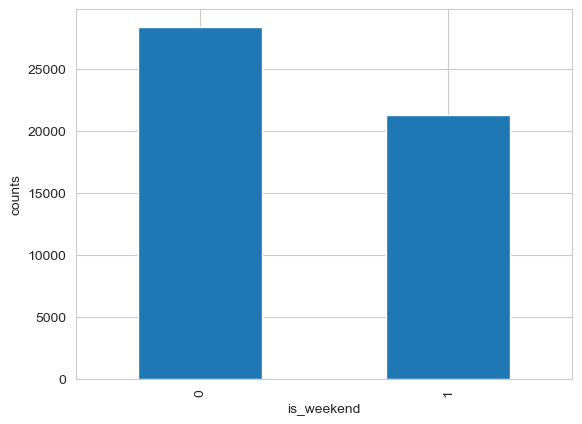

In [32]:
sns.set_style('whitegrid')
data['is_weekend'].value_counts().plot.bar();
plt.xlabel('is_weekend')
plt.ylabel('counts')
plt.show()

In [33]:
# Creating a function timeofday to identify if the rides were in morning, day, evening or night

def timeofday(hour):
    if hour < 0 or hour >= 24:
        return "Invalid"
    elif hour < 0  and hour <= 6:
        return "Night"
    elif hour > 6 and hour <= 10:
        return "Morning"
    elif hour > 10 and hour <= 16:
        return "Noon"
    elif hour > 16 and hour <= 21:
        return "Evening"
    else:
        return "Night"
        
data['time_of_day'] = data['hour'].apply(timeofday)

Text(0, 0.5, 'counts')

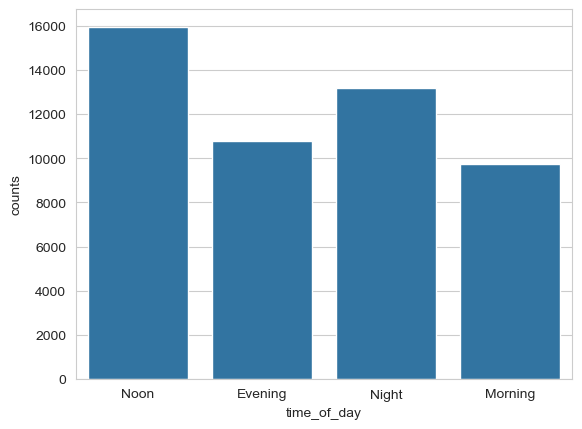

In [34]:
# analysing time_of_day from the dataset
sns.countplot(x='time_of_day',data=data)
plt.xlabel('time_of_day')
plt.ylabel('counts')

In [35]:
# created dummies for time_of_day column and then converted to int dtype
data = pd.get_dummies(data, columns = ['time_of_day'])

In [36]:
data['time_of_day_Morning'] = data['time_of_day_Morning'].astype(int)
data['time_of_day_Noon'] = data['time_of_day_Noon'].astype(int)
data['time_of_day_Evening'] = data['time_of_day_Evening'].astype(int)
data['time_of_day_Night'] = data['time_of_day_Night'].astype(int)

In [37]:
data.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,datetime_est,date,month,year,hour,day,day_of_week,is_weekend,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,time_of_day_Noon
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 13:26:21-04:00,2009-06-15,6,2009,13,Mon,0,0,0,0,0,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 11:52:16-05:00,2010-01-05,1,2010,11,Tue,1,0,0,0,0,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-17 20:35:00-04:00,2011-08-17,8,2011,20,Wed,2,0,1,0,0,0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 00:30:42-04:00,2012-04-21,4,2012,0,Sat,5,1,0,0,1,0
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 02:51:00-05:00,2010-03-09,3,2010,2,Tue,1,0,0,0,1,0


In [38]:
data.shape

(49704, 19)

## Function to calculate distance

#### Here, I have created a function to calculate distance from the coordinates of pickup and dropoff locations. This function is an inspiration from various sources which include blogs and youtube videos. I also tried using other methods like - Manhattan distance and Euclidean disance method but it didn't work well for me. So, I created my own function to get better results.

In [39]:
R = 3963 # Radius of earth in miles

In [40]:
def deg_to_rad(degrees):
    return degrees*(np.pi/180)

In [41]:
def dist(lat1,long1,lat2,long2):
    d_lat = deg_to_rad(lat2-lat1)
    d_long = deg_to_rad(long2-long1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_long/2)**2
    c = 2 * np.arctan2(np.sqrt(a),np.sqrt(1-a))
    return R*c

In [42]:
# Create a new column 'distance' and apply the above function to calculate distance
data['distance_miles'] = data.apply(lambda row: dist(row['latitude_of_pickup'], row['longitude_of_pickup'], row['latitude_of_dropoff'], row['longitude_of_dropoff']), axis=1)

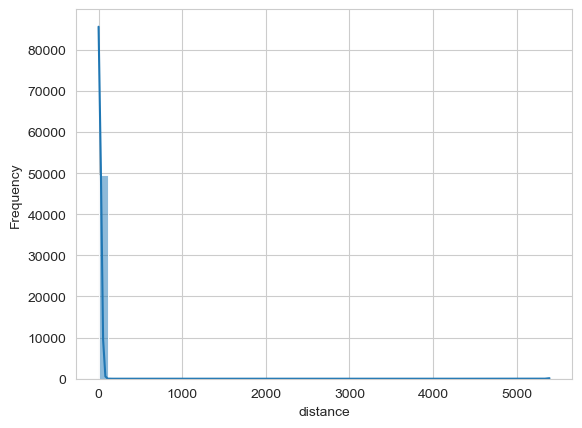

In [43]:
sns.histplot(data['distance_miles'], bins=50, kde=True)
plt.xlabel('distance')
plt.ylabel('Frequency')
plt.show()

In [44]:
data.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,month,year,hour,day_of_week,is_weekend,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,time_of_day_Noon,distance_miles
count,49704.000000,49704.000000,49704.000000,49704.000000,49704.000000,49704.000000,49704.000000,49704.000000,49704.000000,49704.000000,49704.000000,49704.000000,49704.000000,49704.000000,49704.000000,49704.000000
mean,11.198218,-72.513016,39.935453,-72.509164,39.928761,1.673487,6.279414,2011.738633,11.785933,2.978412,0.428939,0.216924,0.196181,0.265793,0.321101,11.010403
std,8.945210,10.383505,6.222463,10.392199,6.008323,1.288012,3.461730,1.865353,5.856214,1.913233,0.494930,0.412155,0.397111,0.441759,0.466904,215.174273
min,0.010000,-75.423848,-74.006893,-84.654241,-74.006377,1.000000,1.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992065,40.734900,-73.991116,40.734490,1.000000,3.000000,2010.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.760480
50%,8.500000,-73.981840,40.752685,-73.980069,40.753422,1.000000,6.000000,2012.000000,12.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.316416
75%,12.500000,-73.967177,40.767378,-73.963646,40.768172,2.000000,9.000000,2013.000000,17.000000,5.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.414534
max,60.000000,40.783472,401.083332,40.851027,43.415190,6.000000,12.000000,2015.000000,23.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5391.707103


In [45]:
#data.to_csv("Taxiupdated.csv",index=False)

In [46]:
# Handling the data in distance column which had extreme and null values. Here, I chose distances from range 0.5 miles to 60 miles as most of the rides were in this distance range.
data = data[(data['distance_miles'] <= 60) & (data['distance_miles'] > 0.5)]

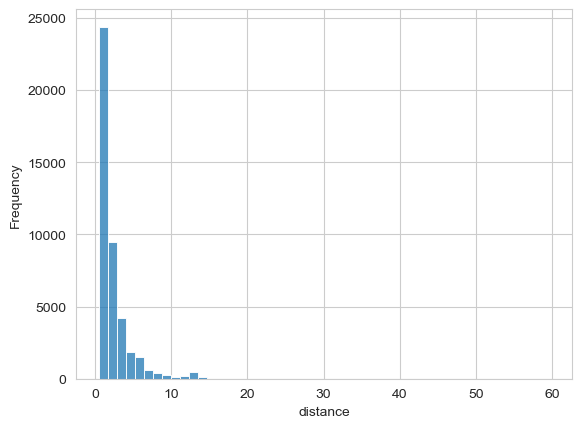

In [47]:
sns.histplot(data['distance_miles'], bins=50)
plt.xlabel('distance')
plt.ylabel('Frequency')
plt.show()

In [48]:
data.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,datetime_est,date,month,year,hour,day,day_of_week,is_weekend,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,time_of_day_Noon,distance_miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 13:26:21-04:00,2009-06-15,6,2009,13,Mon,0,0,0,0,0,1,0.641174
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 11:52:16-05:00,2010-01-05,1,2010,11,Tue,1,0,0,0,0,1,5.256299
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-17 20:35:00-04:00,2011-08-17,8,2011,20,Wed,2,0,1,0,0,0,0.864337
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 00:30:42-04:00,2012-04-21,4,2012,0,Sat,5,1,0,0,1,0,1.741251
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 02:51:00-05:00,2010-03-09,3,2010,2,Tue,1,0,0,0,1,0,1.243550


In [49]:
#Euclidean distance
#lat1 = data['latitude_of_pickup']
#lat2 = data['latitude_of_dropoff']
#long1 = data['longitude_of_pickup']
#long2 = data['longitude_of_dropoff']
#data['distance'] = np.sqrt(((long1 - long2) ** 2) + ((lat1 - lat2) **  2))

In [50]:
#data['distance_Manhattan'] = (abs(long1 - long2) + (abs(lat1 - lat2)))

In [51]:
#r = 6371
#data['distance_kms']= (data['distance'] * np.pi * r / 180)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43602 entries, 0 to 49997
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype                     
---  ------                --------------  -----                     
 0   amount                43602 non-null  float64                   
 1   date_time_of_pickup   43602 non-null  datetime64[ns, UTC]       
 2   longitude_of_pickup   43602 non-null  float64                   
 3   latitude_of_pickup    43602 non-null  float64                   
 4   longitude_of_dropoff  43602 non-null  float64                   
 5   latitude_of_dropoff   43602 non-null  float64                   
 6   no_of_passenger       43602 non-null  int64                     
 7   datetime_est          43602 non-null  datetime64[ns, US/Eastern]
 8   date                  43602 non-null  object                    
 9   month                 43602 non-null  int32                     
 10  year                  43602 non-null  int32        

## Training and Testing of data on different models

In [53]:
# Selecting feature and target variable
X = data[['distance_miles','no_of_passenger','day_of_week','is_weekend','month','year','hour','time_of_day_Noon','time_of_day_Evening','time_of_day_Morning','time_of_day_Night']]
y = data['amount']

In [54]:
# Splitting dataset into training and testing datsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

In [56]:
# Intializing the model
lm = LinearRegression()

In [57]:
# Training the dataset
lm.fit(X_train,y_train)

LinearRegression()

In [58]:
#cross_val_score(lm,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [59]:
# Making predictions
prediction_lm = lm.predict(X_test)

In [60]:
# Analyzing the predicted results with help of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction_lm))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction_lm))
print('Root Mean Squared Error:', metrics.root_mean_squared_error(y_test, prediction_lm))

Mean Absolute Error: 2.2490571223246936
Mean Squared Error: 14.064333361413295
Root Mean Squared Error: 3.7502444402216364


#### Here MAE, MSE, RMSE are indicating lower values which is a sign of better performance.

In [61]:
#print('Coefficients:', lm.coef_)

In [62]:
coefficients = pd.DataFrame(lm.coef_, X.columns)
coefficients.columns = ['Coefficient']
coefficients

,Coefficient
distance_miles,7.722845e+00
no_of_passenger,5.813970e-02
day_of_week,1.855419e-02
is_weekend,-1.263218e-01
month,2.857492e-01
year,1.148853e+00
hour,-2.508834e-01
time_of_day_Noon,-3.244087e+12
time_of_day_Evening,-2.883037e+12
time_of_day_Morning,-2.755625e+12


In [63]:
# Analysing the prediction through r2 metric
print('r2 score is ', r2_score(y_test, prediction_lm))

r2 score is  0.8233554553187215


Text(0, 0.5, 'Predicted Y')

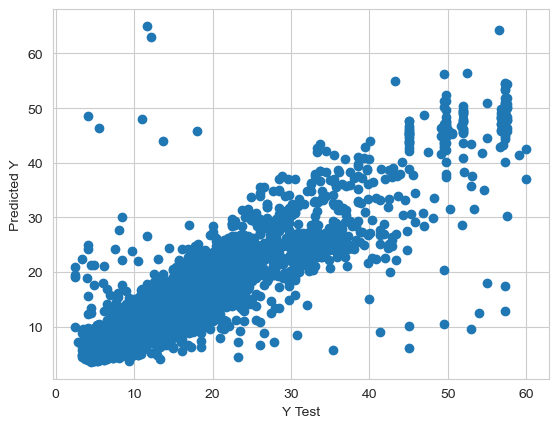

In [64]:
plt.scatter(y_test, prediction_lm)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Decision Tree

In [65]:
# Intializing the model
dtree=DecisionTreeRegressor()

In [66]:
parameter = {
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter' : ['best','random'],
    'max_depth' : [1,2,3,4,5,6,7,8,None]
}

In [67]:
tree_regressor = GridSearchCV(dtree,param_grid=parameter,scoring='r2',cv=5,n_jobs=-1)

In [68]:
tree_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, None],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [69]:
# best parameter for the model
print(tree_regressor.best_params_)

{'criterion': 'poisson', 'max_depth': 6, 'splitter': 'best'}


In [70]:
# best score
print(tree_regressor.best_score_)

0.8552359232741885


In [71]:
# Making predictions
predictions = tree_regressor.predict(X_test)

In [72]:
# Training the dataset
#dtree.fit(X_train,y_train)

In [73]:
# Making predictions
#predictions=dtree.predict(X_test)

In [74]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', metrics.root_mean_squared_error(y_test, predictions))

Mean Absolute Error: 2.068567937833667
Mean Squared Error: 12.63594407247398
Root Mean Squared Error: 3.554707311787284


##### Here MAE, MSE, RMSE are indicating lower values as compared to linear regression, i.e model is performing good.

In [75]:
print('r2 score is ', r2_score(y_test, predictions))

r2 score is  0.8412956711176838


Text(0, 0.5, 'Predicted Y')

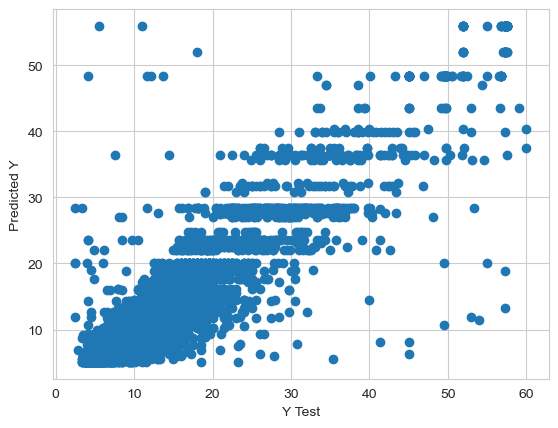

In [76]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Random Forest

In [77]:
# Intializing the model
rforest = RandomForestRegressor(n_estimators = 100)

In [78]:
parameter = {
    'n_estimators' : [10,30,50,70,100],
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
}

In [79]:
rfc_regressor = GridSearchCV(rforest,param_grid=parameter,scoring='r2',cv=5,n_jobs=-1)

In [80]:
rfc_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'n_estimators': [10, 30, 50, 70, 100]},
             scoring='r2')

In [81]:
# best parameter for the model
print(rfc_regressor.best_params_)

{'criterion': 'absolute_error', 'n_estimators': 100}


In [82]:
# best score
print(rfc_regressor.best_score_)

0.8562574198415754


In [83]:
# Making predictions
predictions = rfc_regressor.predict(X_test)

In [84]:
# Training the dataset
#rforest.fit(X_train,y_train)

In [85]:
# Making predictions
#predictions = rforest.predict(X_test)

In [86]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', metrics.root_mean_squared_error(y_test, predictions))

Mean Absolute Error: 2.0523269464510947
Mean Squared Error: 12.211705918910674
Root Mean Squared Error: 3.4945251349662194


#### Here MAE, MSE, RMSE are showing good results as compared to Linear Regression and Decision Tree.

In [87]:
print('r2 score is ', r2_score(y_test, predictions))

r2 score is  0.8466239972847966


Text(0, 0.5, 'Predicted Y')

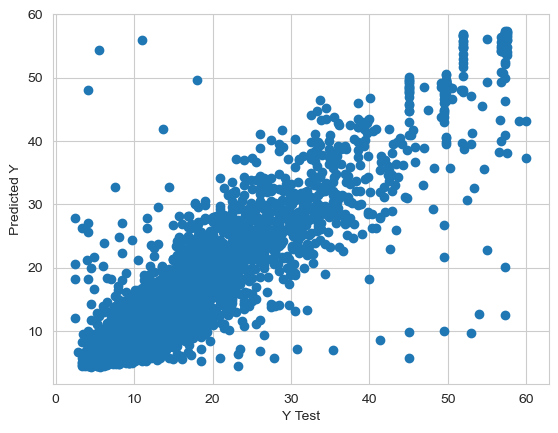

In [88]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## From the above analysis, we can conclude :
### * Random Forest has provided better performance with hyperparameter among the three models, with the lowest MAE, MSE, and RMSE.

### * The distance between pickup and dropoff locations was the most important predictor of fare amount, having the highest coefficient value of 7.722 and other features like the no_of_passenger, hour, day_of_week, time_of_day also contributed to the model's accuracy with their respective coefficients.

### * Some coefficients were negative, and suggests a need to evaluate these features further for their impact on the fare amount prediction.